In [71]:
import sys
import pandas as pd
import matplotlib as plt
from datetime import date, datetime, timedelta
import matplotlib.dates as mdates
from PIL import Image as im
from matplotlib import colors

from config import *
from SE_Interface import *

In [72]:
se_interface = SE_Interface()

#summer = datetime(year=2021, month=10, day=10, hour=23)
now = datetime.now()
data = se_interface.request_SitePowerDetailed(now, timedelta(days=1))
#data = se_interface.request_SitePowerDetailed(summer, timedelta(days=1))

Requesting: https://monitoringapi.solaredge.com/site/2130766/powerDetails?meters=Consumption,Production&startTime=2021-12-15 19:55:10&endTime=2021-12-16 19:55:10&api_key=NTT5LNJGA5CDCFI9OZGZCX2W1VD3CCW2


In [3]:
data

,Production,Consumption
Datetime,,
2021-12-15 18:00:00,0.0,714.17426
2021-12-15 18:15:00,0.0,2096.79500
2021-12-15 18:30:00,0.0,4642.52830
2021-12-15 18:45:00,0.0,2668.94950
2021-12-15 19:00:00,0.0,3348.99460
...,...,...
2021-12-16 17:00:00,0.0,859.04706
2021-12-16 17:15:00,0.0,664.71640
2021-12-16 17:30:00,0.0,800.17770


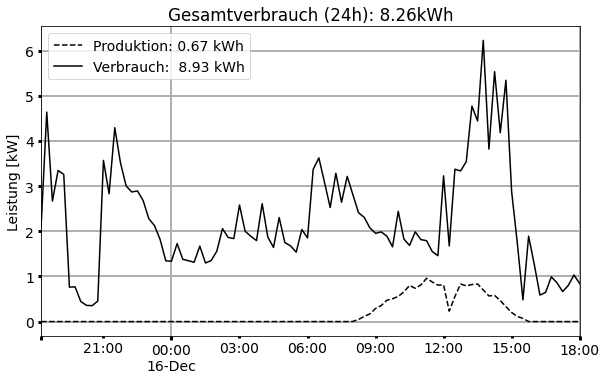

In [4]:
df = data.copy()
df = df / 1000 # set to KWh
df = df.iloc[1: , :]    # Drop first row

# Plot lines
scaling = 100
fontsize = 14
width = EPD_WIDTH / scaling
height = EPD_HEIGHT / scaling
cmap = colors.ListedColormap(["black"])


# Add total consumption
hours = pd.Timedelta(data.index.values[-1] - data.index.values[0]) / pd.Timedelta("1 hour")
total_production = df["Production"].sum() / hours
total_consumption = df["Consumption"].sum() / hours
total = (total_consumption - total_production) 


df.plot(style=["--", "-"], figsize=(width, height), cmap=cmap, fontsize=fontsize)



# Formatting
plt.title(f"Gesamtverbrauch (24h): {total:.2f}kWh", fontsize=fontsize*1.2)
plt.grid(linewidth=2)
plt.xlabel("")
plt.ylabel("Leistung [kW]", fontsize=fontsize)
plt.legend(labels=[f"Produktion: {total_production:.2f} kWh", f"Verbrauch:  {total_consumption:.2f} kWh"], fontsize=fontsize)
plt.gca().xaxis.set_tick_params(which='both', width=3)
plt.gca().yaxis.set_tick_params(which='both', width=3)



# Output
#plt.tight_layout()
page_margin = 0.075
plt.subplots_adjust(left=0.06, right=0.995, top=0.995, bottom=0.1)
plt.savefig("../out/plot.png", dpi=500, facecolor="white")
plt.show()

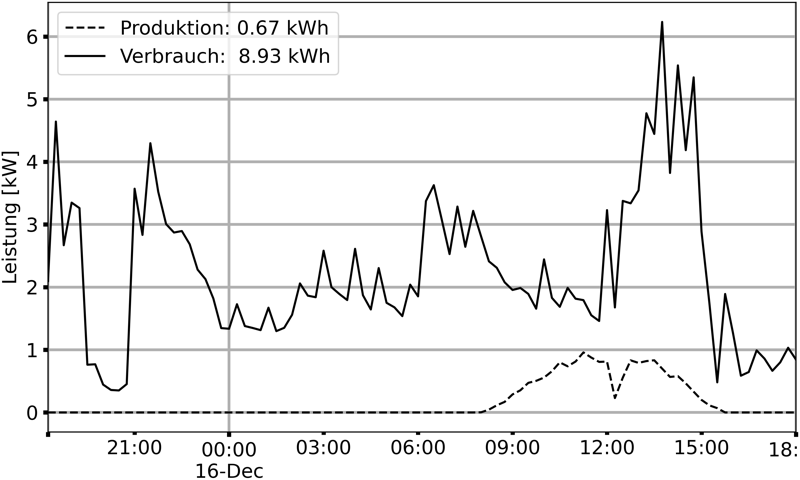

In [5]:
# png to bmp
from PIL import Image

file_in = "../out/plot.png"
img = Image.open(file_in)#.convert("1")

thresh = 20
fn = lambda x : 255 if x > thresh else 0
r = img.convert('L').point(fn, mode='1')


img = img.resize((800,480))
file_out = "../out/plot.bmp"
img.save(file_out)
img


In [70]:
# include parent folder (Notebook version)
import os, sys, inspect

notebook_dir = os.getcwd()
parentdir = os.path.dirname(notebook_dir)

sys.path.insert(0, parentdir)


from lib.epd7in5_V2 import *
from PIL import Image,ImageDraw,ImageFont

epd = EPD()

logging.info("init and Clear")
epd.init()
epd.Clear()

RuntimeError: Cannot find sysfs_software_spi.so

In [7]:
Himage = Image.open("../out/plot.bmp")
epd.display(epd.getbuffer(Himage))